# Image Augmentation/Generation

In [1]:
import os
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Load directories

In [2]:
base_dir = "Grayscale_Face_images"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

### Helper functions

We will extract features from the images using a pre-trained ResNet152 model. This model is used to convert images into a feature vector that can be used for training a classifier.

In [3]:
base_model = tf.keras.applications.ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Freeze the layers of the base model

In [4]:
for layer in base_model.layers:
    layer.trainable = False

Now we create a model on top of the base_model to improve the results

In [5]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Nueva capa densa
    Dropout(0.3),  # Regularización con dropout
    Dense(8, activation='softmax')
])
# Compile 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Instantiate the generators

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Grayscale_face_images/train',  # Training data folder
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'Grayscale_face_images/test',  # Validation data folder
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 5627 images belonging to 8 classes.
Found 1220 images belonging to 8 classes.


When the generators are ready, we can now train the augmented network

In [7]:

# Fit the model and save the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

model.save('enhanced_pretrained.h5')

model.summary()

Epoch 1/10
87/87 [==============================] - 143s 2s/step - loss: 2.6933 - accuracy: 0.1203 - val_loss: 2.0797 - val_accuracy: 0.1439
Epoch 2/10
87/87 [==============================] - 119s 1s/step - loss: 2.0796 - accuracy: 0.1204 - val_loss: 2.0799 - val_accuracy: 0.1127
Epoch 3/10
87/87 [==============================] - 118s 1s/step - loss: 2.0856 - accuracy: 0.1194 - val_loss: 2.0800 - val_accuracy: 0.1110
Epoch 4/10
87/87 [==============================] - 119s 1s/step - loss: 2.0902 - accuracy: 0.1217 - val_loss: 2.0801 - val_accuracy: 0.1201
Epoch 5/10
87/87 [==============================] - 119s 1s/step - loss: 2.0795 - accuracy: 0.1217 - val_loss: 2.0803 - val_accuracy: 0.1127
Epoch 6/10
87/87 [==============================] - 119s 1s/step - loss: 2.0795 - accuracy: 0.1260 - val_loss: 2.0804 - val_accuracy: 0.1118
Epoch 7/10
87/87 [==============================] - 119s 1s/step - loss: 2.0794 - accuracy: 0.1273 - val_loss: 2.0805 - val_accuracy: 0.1127
Epoch 8/10
87

Visualise results

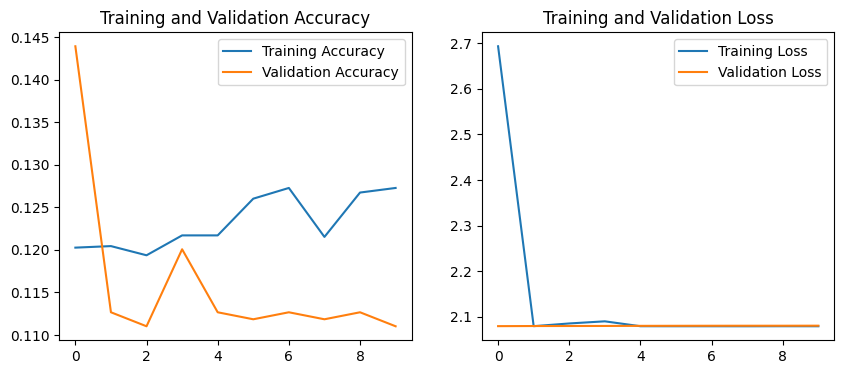

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
